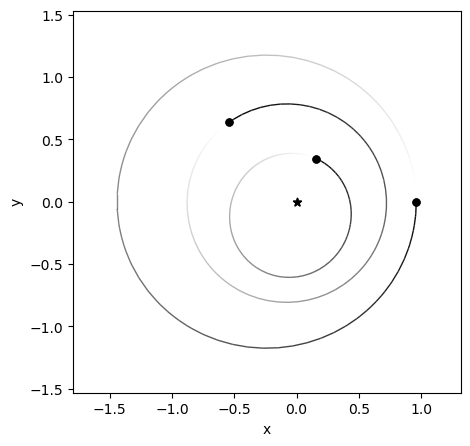

In [28]:
import rebound
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-3, e=0.24, a=0.5, pomega=1.14)
sim.add(m=1e-3, e=0.1, a=0.8, omega=0.14, l=2.1)
sim.add(m=1e-3, e=0.2, a=1.2, pomega=0)
%matplotlib inline
op = rebound.OrbitPlot(sim)

# The Hamiltonian

Reference: [Jeremy Rath et al 2022 ApJ 932 61](https://iopscience.iop.org/article/10.3847/1538-4357/ac5f57/meta)

The Hamiltonian of our system is
$$H(\phi,p,t) = \frac{p^2}{2} - \epsilon_1\cos{(\phi)} - \epsilon_2\cos{(r(\phi-\nu t))}.$$
The corresponding Hamilton equations of motions are
$$\dot{\phi} = \frac{\partial H}{\partial p} = p,$$
and
$$\dot{p} = -\frac{\partial H}{\partial \phi} = -\epsilon_1 \sin{(\phi)} - r\epsilon_2\sin{(r(\phi-\nu t))}.$$

# Solve and Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def wrapRad(theta):
    return (theta + np.pi) % (2*np.pi) - np.pi

We solve for $\phi(t)$ and $p(t)$ numerically. Then we sample at times $t$, such that $r\nu t = 2k\pi$ ($k\in\mathbb{Z}^+$), and create a phase-space plot.

In [3]:
def hamilton(y,t,e1,e2,r,nu):
    phi, p = y
    dydt = [p, -e1*np.sin(phi) - r*e2*np.sin(r*(phi-nu*t))]
    return dydt

In [19]:
def sep(phi,e1,e2,nu):
    sep1 = np.sqrt(1/2*(e1*(1+np.cos(phi)) + e2*(1+np.cos(phi))))
    return 2*sep1*np.sqrt(e1/(e1+e2)), 2*sep1*np.sqrt(e2/(e1+e2))+nu

In [23]:
# solve and plot
def phasePlot(e1, e2, r, nu, ic):
    num = 201  # number of sampled time
    t = np.linspace(0,num-1,num)*2*np.pi/(r*nu)
    
    plt.rcParams["figure.figsize"] = (7,7)
    for y0 in ic:
        sol = odeint(hamilton, y0, t, args=(e1,e2,r,nu))
        phi = [wrapRad(x) for x in sol[:,0]]
        plt.plot(phi, sol[:,1], 'k.', ms=1)
    
    # separatrix
#     phi_sep = np.linspace(-np.pi, np.pi, 50)
#     sol_sep1, sol_sep2 = sep(phi_sep, e1, e2, nu)
#     plt.plot(phi_sep, sol_sep1, color='blue')
#     plt.plot(phi_sep, -sol_sep1, color='blue')
#     plt.plot(phi_sep, sol_sep2, color='blue')
#     plt.plot(phi_sep, -sol_sep2+2*nu, color='blue')
    
#     plt.xlabel(r'$\phi$')
#     plt.ylabel(r'$p$')
#     plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ['-$\pi$','-$\pi$/2', '0', '$\pi$/2', '$\pi$'])
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    plt.show()

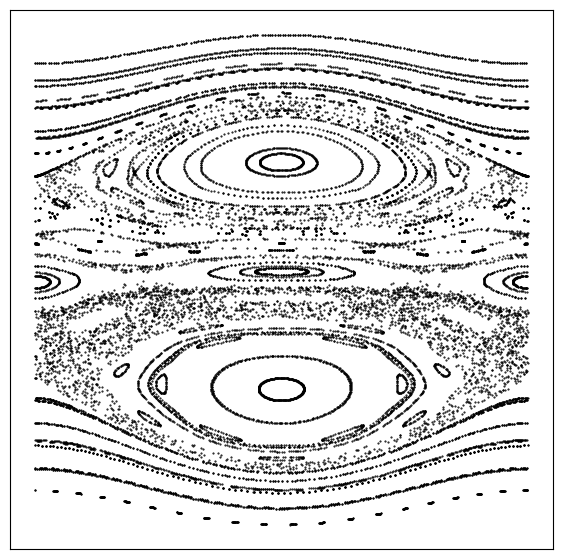

In [24]:
ic = [[x,y] for x in np.linspace(-np.pi, np.pi, 5) for y in np.linspace(-2, 6, 20)]
phasePlot(0.6, 0.4, 1,4,ic)